In [1]:
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
celsius_input = np.array([-40,-10,0,8,15,22,38],dtype=float)
fahrenheit_output = np.array([-40,14,32,46,59,72,100],dtype=float)

for i,c in enumerate(celsius_input):
    print('{} degrees celsius == {} degrees fahrenheit'.format(c,fahrenheit_output[i]))

-40.0 degrees celsius == -40.0 degrees fahrenheit
-10.0 degrees celsius == 14.0 degrees fahrenheit
0.0 degrees celsius == 32.0 degrees fahrenheit
8.0 degrees celsius == 46.0 degrees fahrenheit
15.0 degrees celsius == 59.0 degrees fahrenheit
22.0 degrees celsius == 72.0 degrees fahrenheit
38.0 degrees celsius == 100.0 degrees fahrenheit


### Machine Learning Terms
**Feature** - is/are the input variable(s).
**Labels** - is the output
**Example** - comprises of the corresponding pair of feature and label

In [3]:
l0 = tf.keras.layers.Dense(units = 1, input_shape=[1])

In [4]:
model = tf.keras.Sequential([l0])

In [5]:
model.compile(loss = 'mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))

In [6]:
test = model.fit(celsius_input,fahrenheit_output,epochs=500,verbose=False)
print('Finished training the model')

Finished training the model


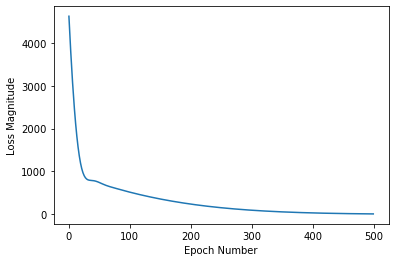

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(test.history['loss'])

In [8]:
print(model.predict([100.0]))

[[211.30612]]


In [9]:
print('These are the layer variables: {}'.format(l0.get_weights()))

These are the layer variables: [array([[1.8248354]], dtype=float32), array([28.82258], dtype=float32)]


## Try it out with 3 layers this time

In [10]:
l0 = tf.keras.layers.Dense(units = 4, input_shape=[1])
l1 = tf.keras.layers.Dense(units = 4)
l2 = tf.keras.layers.Dense(units = 1)
model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))
hist = model.fit(celsius_input,fahrenheit_output,epochs=500,verbose=False)
print('Finished training the model')
print(model.predict([100.0]))
print('These are the variables for layer 0: {}'.format(l0.get_weights()))
print('These are the variables for layer 1: {}'.format(l1.get_weights()))
print('These are the variables for layer 2: {}'.format(l2.get_weights()))

Finished training the model
[[211.74744]]
These are the variables for layer 0: [array([[-0.53705114,  0.14403814,  0.67910236, -1.0008447 ]],
      dtype=float32), array([ 0.9664631, -2.1508348, -1.1226186, -4.1977644], dtype=float32)]
These are the variables for layer 1: [array([[ 0.26537967,  0.38715923,  0.7653511 ,  0.27988678],
       [-0.21419254, -0.5828617 , -0.29496905, -1.1006306 ],
       [-1.442451  , -0.31926733, -0.41978127,  0.06939872],
       [-1.4090859 , -0.8381772 , -1.735553  , -1.2756394 ]],
      dtype=float32), array([3.9849432, 1.9597101, 3.6915555, 3.9677508], dtype=float32)]
These are the variables for layer 2: [array([[0.6597582 ],
       [0.12793465],
       [0.65999126],
       [0.9132799 ]], dtype=float32), array([3.6098213], dtype=float32)]


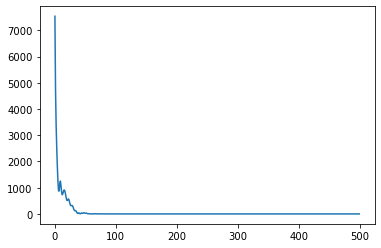

In [11]:
plt.plot(hist.history['loss'])